In [36]:
import wandb
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

---
# Message detection:

In [37]:
def get_runs_df(project, entity="jurujin"):
    '''
    Returns df with data from wandb project for stable-sig
    '''
    api = wandb.Api()
    runs = api.runs(entity + "/" + project)

    summary_list, config_list, name_list = [], [], []
    for run in runs:
        summary_list.append(run.summary._json_dict)
        config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})
        name_list.append(run.name)


    summary_df = pd.DataFrame(summary_list)
    config_df = pd.DataFrame(config_list)

    df = pd.concat([summary_df.reset_index(drop=True), config_df.reset_index(drop=True)], axis=1)
    df["name"] = name_list

    return df

In [38]:
df_msg = get_runs_df("vae_attacks_metr")

df_msg = df_msg.loc[:, ["Word_acc", "Bit_acc", "vae_attack_quality"]].sort_values(by="vae_attack_quality", ascending=False)

---

In [39]:
df_detect = pd.read_csv("2018_detect.csv")[["Name", '''TPR@1%FPR''', "acc", "auc"]]

df_detect["Name"] = df_detect["Name"].map(lambda x: int(x.replace("vae_2018_", "")))
df_detect.head(1)

,Name,TPR@1%FPR,acc,auc
0,8,1.0,1.0,1.0


In [40]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [41]:
quality = df_detect["Name"]
TPR_1_FPR = df_detect["TPR@1%FPR"]
acc = df_detect["acc"]
auc = df_detect["auc"]

In [42]:
detect_metrics = ['''TPR@1%FPR''', "acc", "auc"]
positions = [
    [0, 1], [2, 0], [2, 2]
]

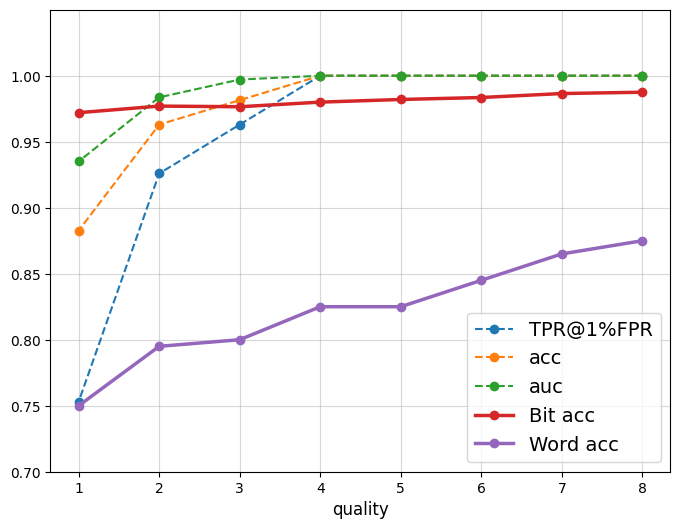

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

for metric, pos in zip(detect_metrics, positions):
    # plt.subplot2grid((4, 4), pos, rowspan=2, colspan=2)

    ax.plot(
        quality, df_detect[metric], '--o', label=metric, markersize=6
    )

ax.plot(
    quality, df_msg["Bit_acc"], '-o', label="Bit acc", markersize=6, linewidth=2.5
)

ax.plot(
    quality, df_msg["Word_acc"], '-o', label="Word acc", markersize=6, linewidth=2.5
)


plt.xticks(
    np.linspace(1, 8, 8)
)
plt.yticks(
    np.linspace(0.6, 1., 9)
)

ax.grid(alpha=0.5)

plt.ylim(0.7, 1.05)
plt.xlabel("quality", fontsize=12)
plt.legend(fontsize=14, loc="lower right")
# --------

plt.savefig("detection_metrics_vae.png", bbox_inches='tight')

- в статье по tree-ring использовали fid_gt

---

In [44]:
df_gt = pd.read_csv("2018_gt.csv")[["Name", "fid_no_w", "fid_w", "fid_att_w", "psnr_no_w", "psnr_w", "psnr_att_w", "ssim_no_w", "ssim_w", "ssim_att_w"]]
df_gt["Name"] = df_gt["Name"].map(lambda x: int(x.replace("q_", "")))

df_gen = pd.read_csv("2018_gen.csv")[["Name", "fid_no_w", "fid_w", "fid_att_w", "psnr_no_w", "psnr_w", "psnr_att_w", "ssim_no_w", "ssim_w", "ssim_att_w"]]
df_gen["Name"] = df_gen["Name"].map(lambda x: int(x.replace("q_", "")))

In [45]:
df_gen = pd.read_csv("2018_gen.csv")[["Name", "fid_no_w", "fid_w", "fid_att_w", "psnr_no_w", "psnr_w", "psnr_att_w", "ssim_no_w", "ssim_w", "ssim_att_w"]]
df_gen["Name"] = df_gen["Name"].map(lambda x: int(x.replace("q_", "")))

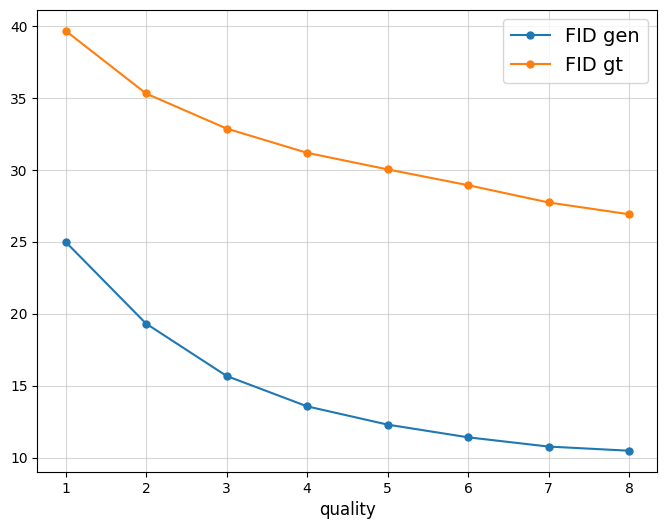

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

metric = "fid_att_w"

plt.plot(
    quality, df_gen[metric], '-o', label="FID gen", markersize=5
)

plt.plot(
    quality, df_gt[metric], '-o', label="FID gt", markersize=5
)

plt.xticks(
    np.linspace(1, 8, 8)
)
# plt.yticks(
#     np.linspace(0, 1, 11)
# )
ax.grid(alpha=0.5)

plt.xlabel("quality", fontsize=12)
plt.legend(fontsize=14)
# --------

plt.savefig("quiality_metrics_vae.png", bbox_inches='tight')
None